In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


In [10]:
X_train.shape

(60000, 28, 28)

5


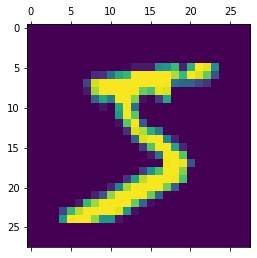

In [16]:
plt.matshow(X_train[0])
print(y_train[0])

In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [39]:
#scaling will help the model

In [40]:
X_train= X_train/255
X_test = X_test/255

In [41]:
#We'll need to flatten the 28x28 grid

In [42]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_test_flattened.shape,X_train_flattened.shape)

(10000, 784) (60000, 784)


In [43]:
# Creating a simple neural network 

In [45]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #output,inputneuron no.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4685 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9290
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2550 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.251

In [55]:
y_preds= model.predict(X_test_flattened)
y_preds[100]

array([2.5088489e-03, 2.9976517e-02, 6.1199892e-01, 2.0367056e-02,
       6.2070787e-03, 1.0768771e-03, 9.7465062e-01, 1.8936396e-04,
       5.2191317e-03, 6.4607775e-05], dtype=float32)

6

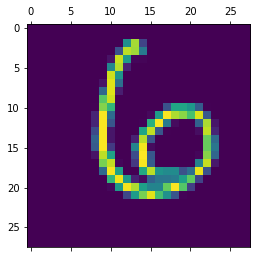

In [56]:
plt.matshow(X_test[100])
np.argmax(y_preds[100]) #prints index of max value

In [62]:
#convering y_pred values to int values using loop 
y_preds_labels= [np.argmax(i) for i in y_preds]
y_preds_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [65]:
y_preds_labels= [np.argmax(i) for i in y_preds]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    7,    2,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   6,    8,  925,   13,    7,    4,   11,    8,   47,    3],
       [   3,    0,   20,  912,    1,   27,    2,    9,   30,    6],
       [   1,    1,    5,    2,  928,    0,    9,    4,   11,   21],
       [   9,    3,    4,   26,    9,  787,   10,    5,   36,    3],
       [  11,    3,   11,    1,    7,   14,  906,    1,    4,    0],
       [   1,    6,   26,    4,   10,    1,    0,  947,    5,   28],
       [   4,    7,    6,   16,    9,   23,    7,    4,  895,    3],
       [   9,    7,    1,    7,   39,    9,    0,   20,   18,  899]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

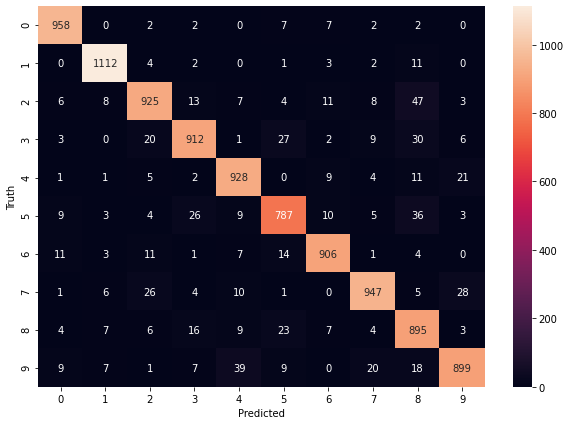

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
#Adding Hidden layers

In [79]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#Flatten function from keras 
    keras.layers.Dense(100,activation='relu'), # 100 in the hidden layer number
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.9212
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1271 - accuracy: 0.9624


In [80]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9658


[0.11838233470916748, 0.9657999873161316]

Text(69.0, 0.5, 'Truth')

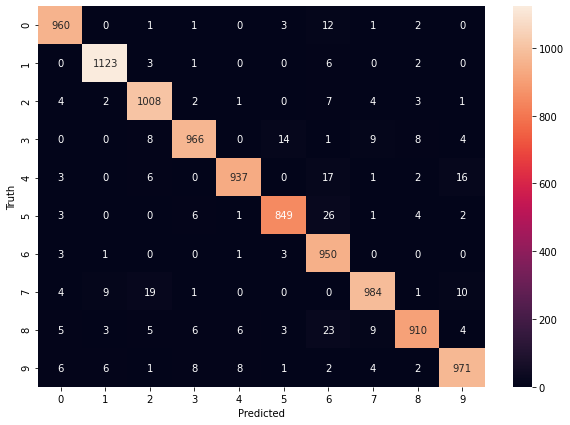

In [81]:
y_preds= model.predict(X_test_flattened)
y_preds_labels= [np.argmax(i) for i in y_preds]

cm_2=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm_2,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')